In [61]:
import pandas as pd
import geopandas as gp
import os
import numpy as np
#Set options for pandas displays
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Arkansas 2016

## VEST Documentation:

Election results from Arkansas Secretary of State (https://www.sos.arkansas.gov/elections/research/election-results)  

Precinct shapefile primarily from Jennifer Wheeler at the Arkansas GIS Office who provided an unreleased interim version of the statewide precinct shapefile with updated or corrected boundaries. Where noted below, the 2016 shapefile release from the Arkansas GIS Office was used to reverse changes not yet enacted for the 2016 election.  

Countywide votes were distributed for Calhoun, Fulton, Izard, Jefferson, Ouachita, Union. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.  

Precinct merges were made in the following counties to match county reporting units: Ashley, Carroll, Chicot, Clark, Crittenden, Dallas, Faulkner, Hot Spring, Howard, Independence, Jackson, Mississippi, Monroe, Nevada, Ouachita, Phillips, Poinsett, St. Francis.  

The following additional revisions were made to match the 2016 precinct boundaries.  

Benton: Reduce precincts from 117 to 94 based on 2016 county PDF; Precinct 61 and 72 boundaries from 2016 shapefile; Align Siloam Springs and Gravette with 2016 municipal boundaries  
Boone: Add precinct splits with municipal and district boundaries on county map  
Craighead: Align Lake City with 2016 municipal boundary  
Crawford: Add Van Buren ward numbers from 2010 VTDs  
Cross: Add Twist Precinct from 2016 shapefile  
Franklin: Merge Ozark 1-C with Ozark 1-B to match 2016 voter file; Add Ozark Rural 1-C boundaries from 2012/2014 Secretary of State shapefile  
Fulton: Split Afton/Mammoth Spring with 2016 shapefile  
Greene: Align Paragould wards with city PDF  
Howard: Add Mineral Springs wards from 2016 shapefile  
Izard: Split Sage in Melbourne 4 and Oxford in Brockwell with township shapefile  
Jackson: Newport JP 2, Newport JP 7, Tuckerman 2 from Justice of the Peace shapefile; Omit R&I 7 as it was not in use for 2016 general election  
Jefferson: Precincts 6, 35, 38, 39, 42, 43, 44, 46, 52, 63, 129, 402, 411 from 2016 shapefile; Reverse Redfield annexation for Precincts 87, 94, 810  
Madison: County precincts outside Huntsville from 2016 shapefile  
Newton: Omit Plumlee although 0 votes reported in election results; Plumlee had merged into Ponca  
Phillips: Add Helena-West Helena wards from city redistricting map  
Sebastian: Reverse Fort Smith annexation for Precincts 4-H, 9-6A  
Sharp: Washington 1 and Washington 2 had no defined boundary; Voters in Washington Township were given the option of 2 poll locations  
St. Francis: Align Forrest City wards with city PDF and municipal code  
Stone: Split Ben 1/Ben 2 according to Secretary of State map; Merge Fifty Six/Northwest and Foothills 1/2 due to early vote reporting errors  
Washington: Reverse Greenland and West Fork annexations with 2016 shapefile  
Yell: Split Dardanelle Ward 3 JP 10 with Justice of the Peace shapefile  
  
G16PRERTRU - Donald J. Trump (Republican Party)  
G16PREDCLI - Hillary Clinton (Democratic Party)  
G16PRELJOH - Gary Johnson (Libertarian Party)  
G16PREOMCM - Evan McMullin (Better for America Party)  
G16PREGSTE - Jill Stein (Green Party)  
G16PREIHED - Jim Hedges (Independent)  
G16PRECCAS - Darrell L. Castle (Constitution Party)  
G16PREIKAH - Lynn S. Kahn (Independent)  
  
G16USSRBOO - John Boozman (Republican Party)  
G16USSDELD - Conner Eldridge (Democratic Party)  
G16USSLGIL - Frank Gilbert (Libertarian Party)  
G16USSOWRI - Write-in Votes  




## Load VEST's Final File

In [62]:
vest_shp = gp.read_file("./raw-from-source/VEST/ar_2016/ar_2016.shp")

In [63]:
vest_shp.shape

(2525, 16)

In [64]:
vest_shp.head(1)

,COUNTY_FIP,COUNTY_NAM,PRECINCT,G16PRERTRU,G16PREDCLI,G16PRELJOH,G16PREOMCM,G16PREGSTE,G16PREIHED,G16PRECCAS,G16PREIKAH,G16USSRBOO,G16USSDELD,G16USSLGIL,G16USSOWRI,geometry
0,037,Cross,Bedford,164,40,2,3,0,1,2,1,152,46,6,1,"POLYGON ((697681.635 3899596.428, 697449.054 3..."


<AxesSubplot:>

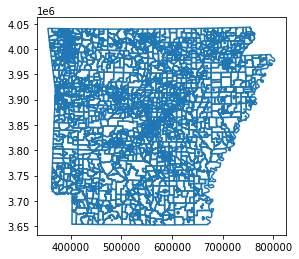

In [65]:
vest_shp.boundary.plot()

### Load Election Data

Because the Arkansas Secretary of State data the precinct level is only available by county (instead of statewide), we used election data from Open Elections (https://github.com/openelections/openelections-data-ar/tree/master/2018). 

In [66]:
election_results = pd.read_csv('./raw-from-source/OpenElections/20161108__ar__general__precinct.csv')

#### Take a look at the dataframe

In [67]:
election_results.head(1)

,county,precinct,office,district,party,candidate,votes,election_day,early_voting,absentee,provisional,hand_count
0,Arkansas,ALMYRA,All Unopposed Candidates,NaN,NON,For,90,68,20,2,0,0


In [68]:
offices=['U.S. President & Vice President','U.S. Senate']
election_results=election_results[election_results['office'].isin(offices)]
election_results.head(10)

,county,precinct,office,district,party,candidate,votes,election_day,early_voting,absentee,provisional,hand_count
12,Arkansas,ALMYRA,U.S. President & Vice President,NaN,BFA,Evan McMullin/Nathan Johnson,2,2,0,0,0,0
13,Arkansas,ALMYRA,U.S. President & Vice President,NaN,CST,Darrell L. Castle/Scott N. Bradley,1,1,0,0,0,0
14,Arkansas,ALMYRA,U.S. President & Vice President,NaN,DEM,Hillary Clinton/Tim Kaine,8,7,1,0,0,0
15,Arkansas,ALMYRA,U.S. President & Vice President,NaN,IND,Lynn S. Kahn/Kathleen Monahan,2,2,0,0,0,0
16,Arkansas,ALMYRA,U.S. President & Vice President,NaN,LIB,Gary Johnson/Bill Weld,3,1,2,0,0,0
17,Arkansas,ALMYRA,U.S. President & Vice President,NaN,REP,Donald J. Trump/Michael R. Pence,96,67,27,2,0,0
18,Arkansas,ALMYRA,U.S. Senate,NaN,DEM,Conner Eldridge,25,20,5,0,0,0
19,Arkansas,ALMYRA,U.S. Senate,NaN,LIB,Frank Gilbert,2,2,0,0,0,0
20,Arkansas,ALMYRA,U.S. Senate,NaN,REP,Senator John Boozman,85,58,25,2,0,0
33,Arkansas,ARKANSAS,U.S. President & Vice President,NaN,DEM,Hillary Clinton/Tim Kaine,15,5,10,0,0,0


In [69]:
#Load the nationwide FIPS file and filter by New Jersey
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Arkansas"]

#Make the FIPS three digits
fips_file["FIPS County"] = fips_file["FIPS County"].astype(str)
fips_file["FIPS County"] = fips_file["FIPS County"].str.zfill(3)

#Create the dictionary
fips_dict = dict(zip(fips_file['County Name'], fips_file['FIPS County']))
fips_dict["Montgomery"] = '097'
fips_dict

{'Arkansas': '001',
 'Ashley': '003',
 'Baxter': '005',
 'Benton': '007',
 'Boone': '009',
 'Bradley': '011',
 'Calhoun': '013',
 'Carroll': '015',
 'Chicot': '017',
 'Clark': '019',
 'Clay': '021',
 'Cleburne': '023',
 'Cleveland': '025',
 'Columbia': '027',
 'Conway': '029',
 'Craighead': '031',
 'Crawford': '033',
 'Crittenden': '035',
 'Cross': '037',
 'Dallas': '039',
 'Desha': '041',
 'Drew': '043',
 'Faulkner': '045',
 'Franklin': '047',
 'Fulton': '049',
 'Garland': '051',
 'Grant': '053',
 'Greene': '055',
 'Hempstead': '057',
 'Hot Spring': '059',
 'Howard': '061',
 'Independence': '063',
 'Izard': '065',
 'Jackson': '067',
 'Jefferson': '069',
 'Johnson': '071',
 'Lafayette': '073',
 'Lawrence': '075',
 'Lee': '077',
 'Lincoln': '079',
 'Little River': '081',
 'Logan': '083',
 'Lonoke': '085',
 'Madison': '087',
 'Marion': '089',
 'Miller': '091',
 'Mississippi': '093',
 'Monroe': '095',
 'Nevada': '099',
 'Newton': '101',
 'Ouachita': '103',
 'Perry': '105',
 'Phillips': '1

In [70]:
#Add FIPS columns
election_results["COUNTY_FIP"]=election_results["county"].map(fips_dict).fillna(election_results["county"])

#### Clean up precinct column by stripping the white space
election_results["precinct"]=election_results["precinct"].str.strip()

#Create a column to pivot table by concatenation the FIPS and precinct columns
election_results["pivot_col"]=election_results["COUNTY_FIP"]+election_results["precinct"]

In [12]:
#Run the pivot
pivoted_results = pd.pivot_table(election_results,values=["votes"],index=["pivot_col"],columns=["candidate"],aggfunc=sum)

#Fill in N/A with 0
pivoted_results = pivoted_results.fillna(0)

#Clean the columns
pivoted_results.reset_index(drop=False,inplace=True)
pivoted_results.columns = pivoted_results.columns.droplevel(0)

In [13]:
#Print to get an idea of the pivoted df
pivoted_results.head(1)

candidate,,Conner Eldridge,Darrell L. Castle/Scott N. Bradley,Donald J. Trump/Michael R. Pence,Evan McMullin/Nathan Johnson,Frank Gilbert,Gary Johnson/Bill Weld,Hillary Clinton/Tim Kaine,Jill Stein/Ajamu Baraka,Jim Hedges/Bill Bayes,Lynn S. Kahn/Kathleen Monahan,Senator John Boozman,WRITE-IN,Write-In
0,001ALMYRA,25.0,1.0,96.0,2.0,2.0,3.0,8.0,0.0,0.0,2.0,85.0,0.0,0.0


In [14]:
pivoted_results.rename(columns={ pivoted_results.columns[0]: "join_col" }, inplace = True)
pivoted_results.columns = pivoted_results.columns.get_level_values(0)

In [15]:
#Add FIPS State and County columns
pivoted_results.insert(loc=0, column='STATE_FIP', value='5')
pivoted_results.insert(loc=1, column='COUNTY_FIP', value=pivoted_results['join_col'].str[0:3])
pivoted_results.insert(loc=3, column='PRECINCT', value=pivoted_results['join_col'].str[3:])

In [16]:
pivoted_results["G16USSOWRI"] = pivoted_results["WRITE-IN"] + pivoted_results["Write-In"]
pivoted_results.drop(['WRITE-IN', 'Write-In'], axis=1, inplace=True)

In [17]:
#Rename Columns
pivoted_results.columns = ['STATE_FIP', 'COUNTY_FIP', 'join_col', 'PRECINCT', 'G16USSDELD','G16PRECCAS','G16PRERTRU','G16PREOMCM','G16USSLGIL','G16PRELJOH','G16PREDCLI','G16PREGSTE','G16PREIHED','G16PREIKAH','G16USSRBOO','G16USSOWRI']

In [18]:
pivoted_results.head(1)

,STATE_FIP,COUNTY_FIP,join_col,PRECINCT,G16USSDELD,G16PRECCAS,G16PRERTRU,G16PREOMCM,G16USSLGIL,G16PRELJOH,G16PREDCLI,G16PREGSTE,G16PREIHED,G16PREIKAH,G16USSRBOO,G16USSOWRI
0,5,001,001ALMYRA,ALMYRA,25.0,1.0,96.0,2.0,2.0,3.0,8.0,0.0,0.0,2.0,85.0,0.0


In [19]:
election_results=pivoted_results

## Allocate Votes

In [20]:
races = [x for x in vest_shp.columns if 'G16' in x]
races

['G16PRERTRU',
 'G16PREDCLI',
 'G16PRELJOH',
 'G16PREOMCM',
 'G16PREGSTE',
 'G16PREIHED',
 'G16PRECCAS',
 'G16PREIKAH',
 'G16USSRBOO',
 'G16USSDELD',
 'G16USSLGIL',
 'G16USSOWRI']

In [21]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

2238198
2238197.0


In [22]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [23]:
searchfor = ['Absentee','ABSENTEE','PROVISIONAL','EARLY VOTE','PAPER BALLOTS','EARLY VOTING']
in_sos =  election_results[election_results["PRECINCT"].str.contains('|'.join(searchfor))]
in_sos = in_sos.groupby(by=["COUNTY_FIP"]).sum().reset_index()
in_sos

,COUNTY_FIP,G16USSDELD,G16PRECCAS,G16PRERTRU,G16PREOMCM,G16USSLGIL,G16PRELJOH,G16PREDCLI,G16PREGSTE,G16PREIHED,G16PREIKAH,G16USSRBOO,G16USSOWRI
0,013,48.0,0.0,46.0,0.0,3.0,3.0,38.0,0.0,0.0,0.0,39.0,0.0
1,049,5.0,0.0,104.0,2.0,40.0,5.0,41.0,2.0,1.0,0.0,107.0,0.0
2,065,61.0,4.0,143.0,0.0,5.0,4.0,54.0,3.0,3.0,1.0,128.0,0.0
3,069,416.0,3.0,228.0,2.0,10.0,7.0,447.0,2.0,4.0,1.0,256.0,2.0
4,103,2362.0,7.0,2471.0,25.0,87.0,49.0,2541.0,12.0,23.0,13.0,2533.0,0.0
5,139,2537.0,18.0,5032.0,48.0,279.0,145.0,2933.0,33.0,29.0,16.0,4967.0,0.0


In [24]:
election_results = election_results[~election_results["PRECINCT"].str.contains('|'.join(searchfor))]
election_results = allocate_absentee(election_results,in_sos,races,'COUNTY_FIP')
print('Done')

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\davey\anaconda3\envs\geo\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Done


## Compare Election Result Totals

### Compare Vote Totals

In [25]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

2238198
2238197.0


### Compare Race Totals

In [26]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [27]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G16PRERTRU is equal 	VEST / RDH: 684872
G16PREDCLI is equal 	VEST / RDH: 380494
G16PRELJOH is equal 	VEST / RDH: 29949
G16PREOMCM is equal 	VEST / RDH: 13176
G16PREGSTE is equal 	VEST / RDH: 9473
G16PREIHED is equal 	VEST / RDH: 4709
G16PRECCAS is equal 	VEST / RDH: 4613
G16PREIKAH is equal 	VEST / RDH: 3390
G16USSRBOO is equal 	VEST / RDH: 661984
G16USSDELD is equal 	VEST / RDH: 400602
G16USSLGIL is equal 	VEST / RDH: 43866
G16USSOWRI has a difference of 1.0 votes
	VEST: 1070 votes
	SOURCES: 1069.0 votes


### Compare County Totals

In [28]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
    print(diff_counties)

In [29]:
county_totals_check(vest_shp,election_results,races,'COUNTY_FIP')

***Countywide Totals Check***

G16PRERTRU is equal across all counties
G16PREDCLI is equal across all counties
G16PRELJOH is equal across all counties
G16PREOMCM is equal across all counties
G16PREGSTE is equal across all counties
G16PREIHED is equal across all counties
G16PRECCAS is equal across all counties
G16PREIKAH is equal across all counties
G16USSRBOO is equal across all counties
G16USSDELD is equal across all counties
G16USSLGIL is equal across all counties
G16USSOWRI contains differences in these counties:
	103 has a difference of 1.0 votes
		VEST: 1 votes
		SOURCES: 0.0 votes
['103']


## Prepare Join

In [30]:
vest_shp['join_col']=vest_shp['COUNTY_FIP']+vest_shp['PRECINCT']

In [31]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

2489
2489
2525
2525


In [32]:
#Uppercase both join columns
election_results['join_col'] = election_results['join_col'].str.upper()
vest_shp['join_col'] = vest_shp['join_col'].str.upper()
#Strip white space
election_results['join_col']=election_results['join_col'].str.strip()
vest_shp['join_col']=vest_shp['join_col'].str.strip()

In [33]:
data_columns = races
empty_precincts = []
for index, row in vest_shp.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PRECINCT"])
print(len(empty_precincts))

39


In [34]:
data_columns = races
empty_precincts = []
for index, row in election_results.iterrows():
    number_of_zero_vote_races = 0
    for race in data_columns:
        if (row[race]==0):
            number_of_zero_vote_races += 1
    if(number_of_zero_vote_races == len(data_columns)):
        empty_precincts.append(row["PRECINCT"])
print(len(empty_precincts))

0


## Attempt Join

In [35]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          1364
right_only    1161
left_only     1125
Name: _merge, dtype: int64


In [36]:
join_attempt_one['join_col'] = join_attempt_one['join_col'].astype('str')
join_attempt_one[join_attempt_one['_merge'] != 'both'][['COUNTY_FIP_x','PRECINCT_x','COUNTY_FIP_y','PRECINCT_y','join_col']].head(10)

,COUNTY_FIP_x,PRECINCT_x,COUNTY_FIP_y,PRECINCT_y,join_col
7,001,DEWITT WARD 1,NaN,NaN,001DEWITT WARD 1
8,001,DEWITT WARD 2,NaN,NaN,001DEWITT WARD 2
9,001,DEWITT WARD 3,NaN,NaN,001DEWITT WARD 3
27,001,STUTTGART WARD 1,NaN,NaN,001STUTTGART WARD 1
28,001,STUTTGART WARD 2,NaN,NaN,001STUTTGART WARD 2
29,001,STUTTGART WARD 3,NaN,NaN,001STUTTGART WARD 3
34,003,CROSSROADS,NaN,NaN,003CROSSROADS
35,003,FH CITY,NaN,NaN,003FH CITY
36,003,FH RURAL,NaN,NaN,003FH RURAL
40,003,HBG RURAL/BC/MIST,NaN,NaN,003HBG RURAL/BC/MIST


In [37]:
example_csv = pd.read_csv("./name_match.csv")
ar_names_dict = dict(zip(example_csv["COLUMN_1"],example_csv["COLUMN_2"]))

In [38]:
#Use the dictionary to change the names
election_results["join_col"]=election_results["join_col"].map(ar_names_dict).fillna(election_results["join_col"])

In [39]:
join_attempt_two = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          2405
right_only     120
left_only       84
Name: _merge, dtype: int64


In [40]:
join_attempt_two[join_attempt_two['_merge'] != 'both'][['COUNTY_FIP_x','PRECINCT_x','COUNTY_FIP_y','PRECINCT_y','join_col']].head(10)

,COUNTY_FIP_x,PRECINCT_x,COUNTY_FIP_y,PRECINCT_y,join_col
390,029,HOWARD CITY,NaN,NaN,029HOWARD CITY
508,035,1st BAPTIST CHURCH WMPH,NaN,NaN,0351ST BAPTIST CHURCH WMPH
509,035,7TH STREET CHURCH WMPH,NaN,NaN,0357TH STREET CHURCH WMPH
511,035,BONDS MARINE,NaN,NaN,035BONDS MARINE
512,035,CALVARY WMPH,NaN,NaN,035CALVARY WMPH
513,035,CIVIC CENTER,NaN,NaN,035CIVIC CENTER
514,035,CRAWFORDSVILLE,NaN,NaN,035CRAWFORDSVILLE
515,035,EARLE CITY HALL,NaN,NaN,035EARLE CITY HALL
516,035,EDMONDSON,NaN,NaN,035EDMONDSON
517,035,GILMORE,NaN,NaN,035GILMORE


### Compare Precinct Votes

In [41]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [42]:
precinct_votes_check(join_attempt_two[join_attempt_two["_merge"]=="both"],races,False,'join_col')

G16PREGSTE ...................................................065CALICO ROCK WARD 3 (S) ....3  (V)....2 (D):    1
G16USSLGIL ................................................................065DOLPH (S) ...10  (V)....9 (D):    1
G16PRECCAS ........................................................065FRANKLIN CITY (S) ....3  (V)....2 (D):    1
G16PREIKAH ..................................................................065GID (S) ....2  (V)....1 (D):    1
G16PREIKAH ................................................065HORSESHOE BEND WARD 2 (S) ....1  (V)....2 (D):   -1
G16PREGSTE ................................................065HORSESHOE BEND WARD 3 (S) ....2  (V)....3 (D):   -1
G16USSLGIL ................................................065HORSESHOE BEND WARD 3 (S) ....9  (V)...10 (D):   -1
G16PRECCAS .................................................................065SAGE (S) ....2  (V)....3 (D):   -1
G16PREIHED ....................................................................0691 (S) 

## Differences in Precinct totals  

Write-In Votes for U.S. Senate are off by 1 vote. VEST total matches Arkansas's official total.

There are a number of 1 to 3 vote differences in the Precinct totals. These are most likely due to a difference in allocating absentee votes between ourselves and VEST.

In Ouachita County CLEVELAND precinct is off by a number of votes. This is most likely due to the fact we were unable to join a number of precincts in this county. This may be because some of the precincts are actually part of the CLEVELAND precinct. We were unable to complete the same process as VEST with the documentation provided.

# Precinct Shapefiles
## Documentation
Precinct shapefiles Arkansas GIS Office(https://gis.arkansas.gov/)

In [43]:
ar_shp = gp.read_file('./raw-from-source/AR_GIS/VOTING_DST_TIGER_2020/VOTING_DST_TIGER_2020.shp')

In [44]:
ar_shp.head(1)

,objectid,statefp20,countyfp20,vtdst20,geoid20,vtdi20,name20,namelsad20,lsad20,mtfcc20,funcstat20,aland20,awater20,intptlat20,intptlon20,fileid,stusab,sumlev,geovar,geocomp,chariter,cifsn,logrecno,region,division,state,statens,countycc,countyns,cbsa,memi,csa,vtd,vtdi,funcstat,pop100,hu100,p0020001,p0020002,p0020003,p0020004,p0020005,p0020006,p0020007,p0020008,p0020009,p0020010,p0020011,p0030001,st_area(sh,st_length(,geometry
0,1,05,119,000101,05119000101,P,Precinct 101,Precinct 101,00,G5240,S,4681480.0,168193.0,+34.7085416,-092.3586504,PLST,AR,700,00,00,000,00,28366.0,3,7,05,00068085,H1,00069177,30780,1,340,000101,P,S,1863.0,789.0,1863.0,232.0,1631.0,1564.0,526.0,1022.0,4.0,9.0,0.0,3.0,67.0,1422.0,4.846204e+06,9867.921191,"POLYGON ((556590.935 3840420.396, 556652.123 3..."


<AxesSubplot:>

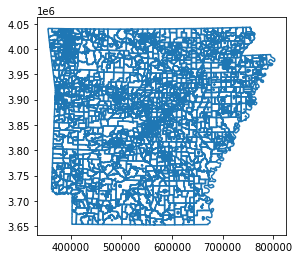

In [45]:
ar_shp.boundary.plot()

In [46]:
print(ar_shp.shape)
vest_shp.shape

(2747, 52)


(2525, 17)

<AxesSubplot:>

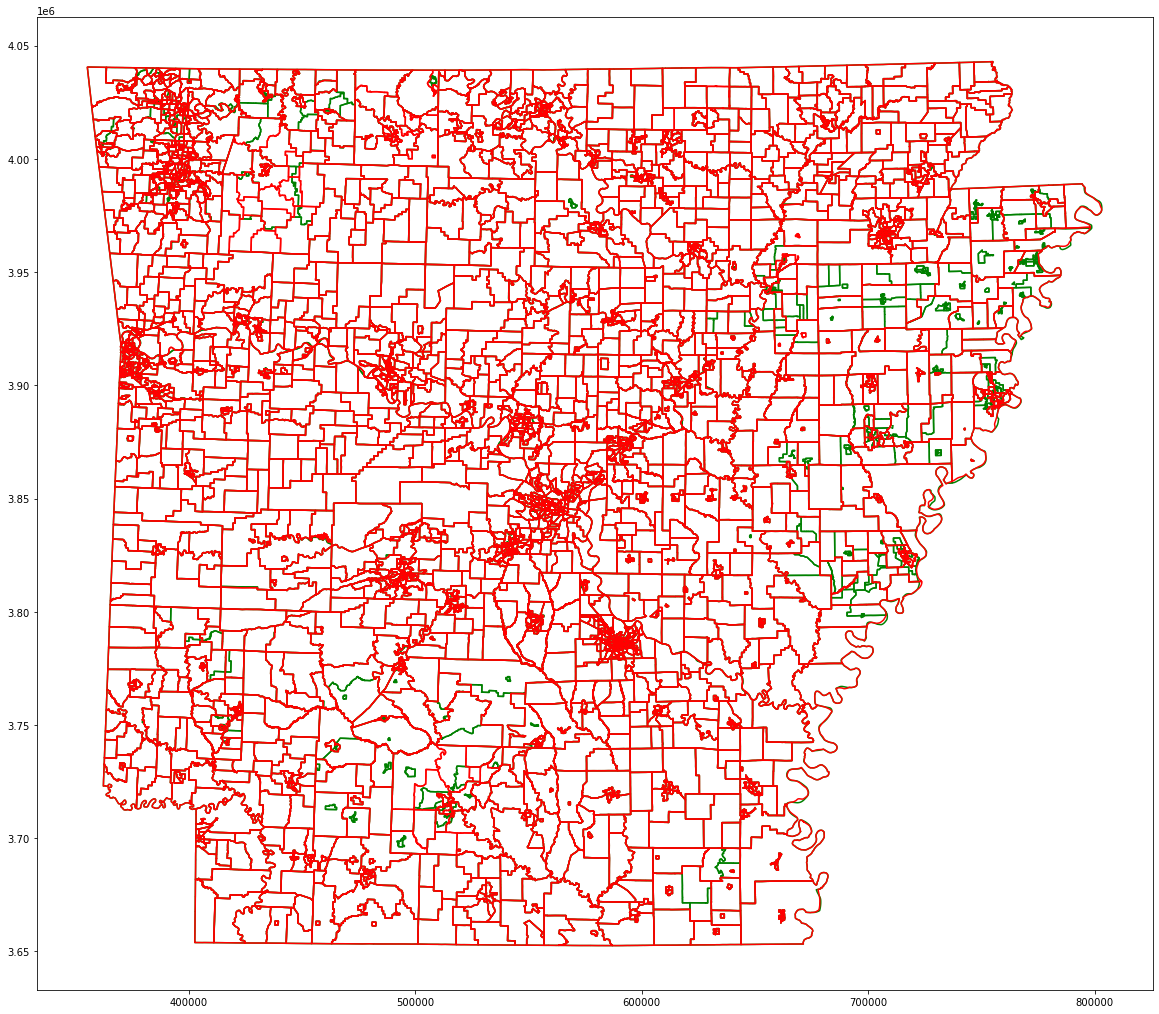

In [47]:
ax = ar_shp.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

In [48]:
ar_shp["join_col"]=ar_shp['countyfp20']+ar_shp['namelsad20']

In [49]:
#Uppercase both join columns
ar_shp['join_col'] = ar_shp['join_col'].str.upper()

#Strip white space
ar_shp['join_col']=ar_shp['join_col'].str.strip()

In [50]:
join_attempt_one = pd.merge(ar_shp,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

left_only     2131
right_only    1873
both           616
Name: _merge, dtype: int64


In [51]:
join_attempt_one['join_col'] = join_attempt_one['join_col'].astype('str')
join_attempt_one[join_attempt_one['_merge'] != 'both'][['countyfp20','namelsad20','COUNTY_FIP','PRECINCT','join_col']].head(10)

,countyfp20,namelsad20,COUNTY_FIP,PRECINCT,join_col
0,119,Precinct 101,NaN,NaN,119PRECINCT 101
1,119,Precinct 126,NaN,NaN,119PRECINCT 126
2,119,Precinct 137,NaN,NaN,119PRECINCT 137
3,019,East County 1,NaN,NaN,019EAST COUNTY 1
4,119,Precinct 135,NaN,NaN,119PRECINCT 135
5,119,Precinct 092,NaN,NaN,119PRECINCT 092
6,119,Precinct 091,NaN,NaN,119PRECINCT 091
7,119,Precinct 094,NaN,NaN,119PRECINCT 094
8,145,90 - Beebe Ward 3 C,NaN,NaN,14590 - BEEBE WARD 3 C
9,119,Precinct 056,NaN,NaN,119PRECINCT 056


In [52]:
example_csv = pd.read_csv("./name_match2.csv")
ar_names_dict2 = dict(zip(example_csv["COLUMN_1"],example_csv["COLUMN_2"]))

In [53]:
#Use the dictionary to change the names
ar_shp["join_col"]=ar_shp["join_col"].map(ar_names_dict2).fillna(ar_shp["join_col"])

In [54]:
join_attempt_two = pd.merge(ar_shp,election_results,how="outer",on="join_col",indicator=True)
print(join_attempt_two["_merge"].value_counts())

both          2259
left_only      488
right_only     230
Name: _merge, dtype: int64


In [55]:
ar_shp_merge = join_attempt_two[join_attempt_two['_merge'] == 'both']

In [56]:
final_merge = pd.merge(ar_shp_merge,vest_shp,how="outer",on="join_col",indicator="final_merge")
final_merge["final_merge"].value_counts()

both          2244
right_only     281
left_only       15
Name: final_merge, dtype: int64

In [57]:
both = final_merge[final_merge["final_merge"]=="both"]
vest_geoms = gp.GeoDataFrame(both,geometry="geometry_x")
source_geoms = gp.GeoDataFrame(both,geometry="geometry_y")
source_geoms = source_geoms.to_crs(3857)
vest_geoms = vest_geoms.to_crs(3857)
source_geoms["geometry_x"]=source_geoms.buffer(0)
vest_geoms["geometry_y"]=vest_geoms.buffer(0)
vals = source_geoms.geom_almost_equals(vest_geoms,decimal=0)
print(vals.value_counts())

False    2244
dtype: int64


1) For 05-000222 difference in area is 0.5079845306887859
2) For 05-000008 difference in area is 9.811369913212355
3) For 05-000012 difference in area is 2.851422120791703
4) For 05-000007 difference in area is 6.285281504863252
5) For 05-000022 difference in area is 4.582081698154211
6) For 05-000001 difference in area is 5.371471397385416
7) For 05-000003 difference in area is 2.5640669972996837
8) For 05-000010 difference in area is 2.86758794160283
9) For 05-000016 difference in area is 0.6686072316606204
10) For 05-000014 difference in area is 35.95506883368702
11) For 05-000026 difference in area is 24.285357024766355
12) For 05-000008 difference in area is 2.0128506452199297
13) For 05-000011 difference in area is 0.5045306785817052
14) For 05-000004 difference in area is 2.177954310652842
15) For 05-000045 difference in area is 0.7530228667319574
16) For 05-000034 difference in area is 1.0780071651517207
17) For 05-000111 difference in area is 0.7898981650626106
18) For 05-009-

C:\Users\davey\anaconda3\envs\geo\lib\site-packages\geopandas\plotting.py:384: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


22) For 05-000006 difference in area is 1.236598884605872
23) For 05-000002 difference in area is 0.9365477635257808
24) For 05-000022 difference in area is 0.5688665040556509
25) For 05-000009 difference in area is 1.1881992160453259
26) For 05-000010 difference in area is 13.480964652130613
27) For 05-000007 difference in area is 0.6270266700495246
28) For 05-000112 difference in area is 0.5489012176701041
29) For 05-000113 difference in area is 0.539282784222313
30) For 05-000007 difference in area is 1.3662504101459425
31) For 05-000006 difference in area is 20.292861734793494
32) For 05-000205 difference in area is 0.6631248239421978
33) For 05-000065 difference in area is 0.9040103729245808
34) For 05-000006 difference in area is 7.25744039659388
35) For 05-000013 difference in area is 1.2653159085432821
36) For 05-000051 difference in area is 0.5881203985867005
37) For 05-000048 difference in area is 0.5147139347326601
38) For 05-000045 difference in area is 0.8656067945588914
3

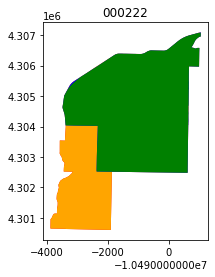

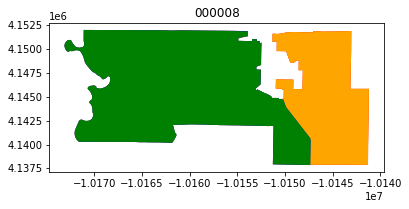

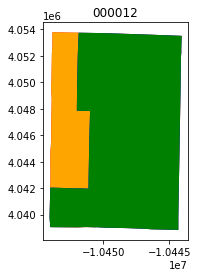

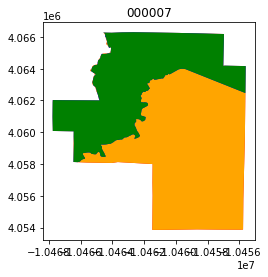

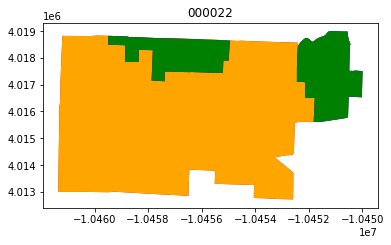

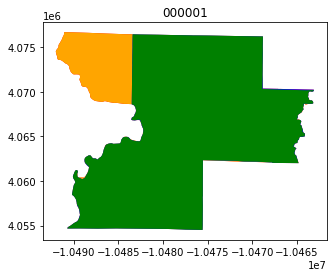

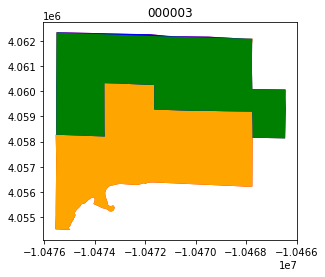

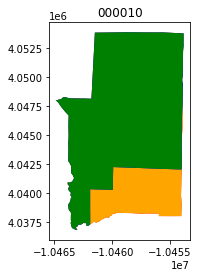

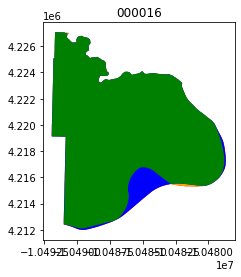

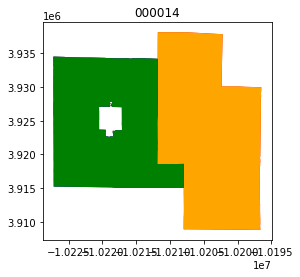

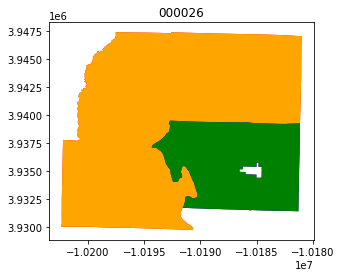

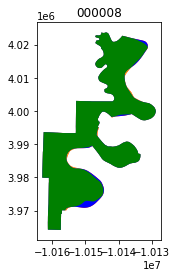

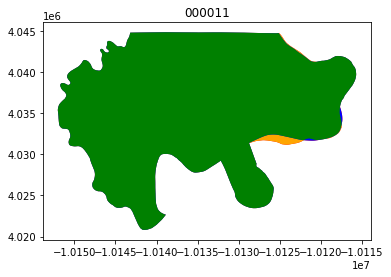

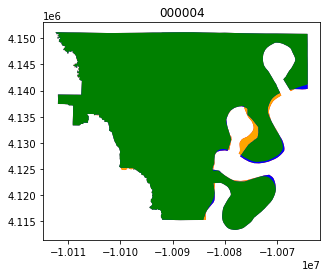

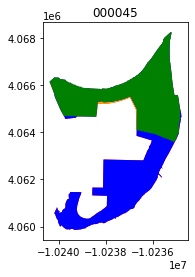

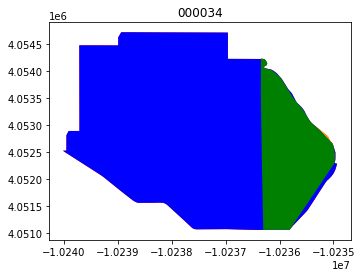

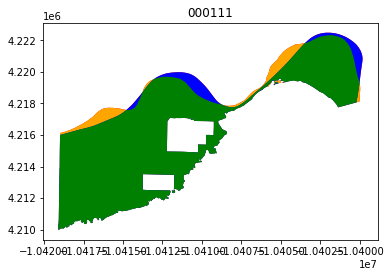

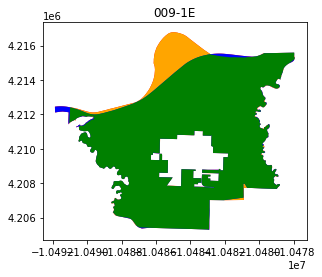

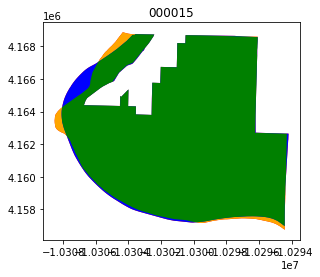

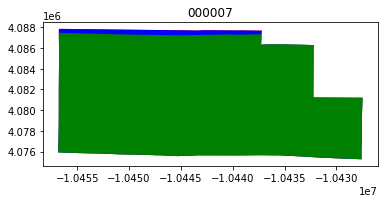

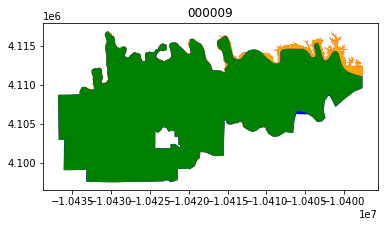

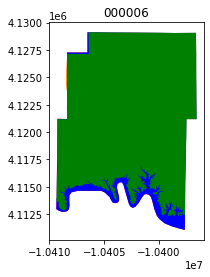

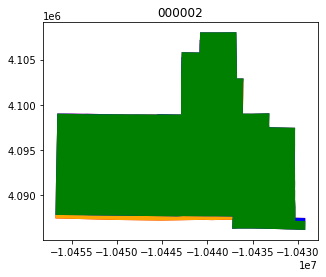

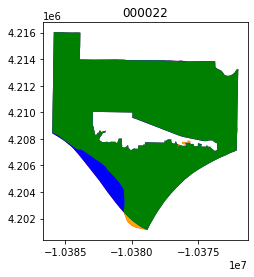

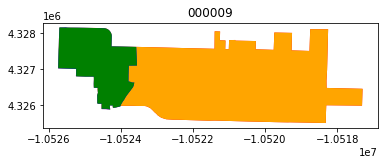

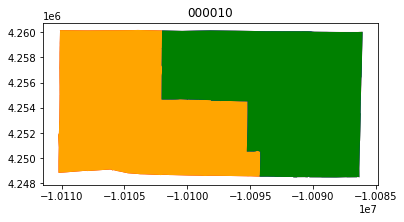

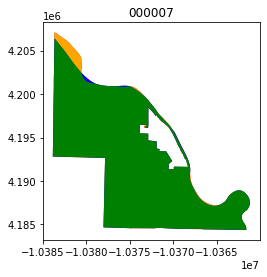

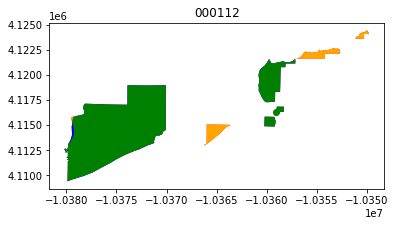

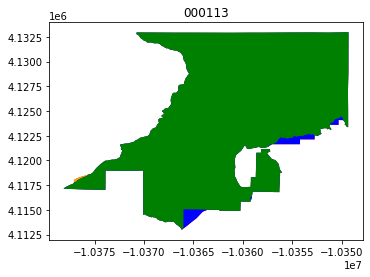

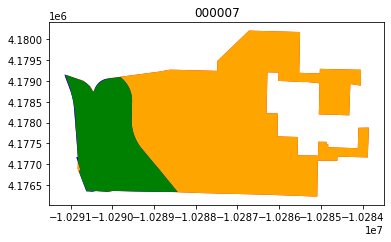

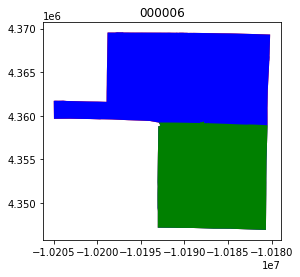

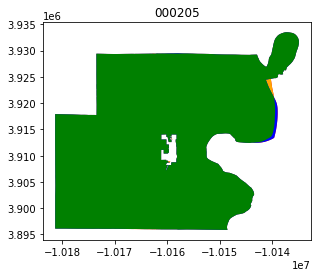

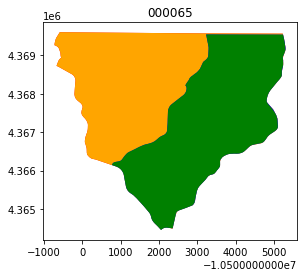

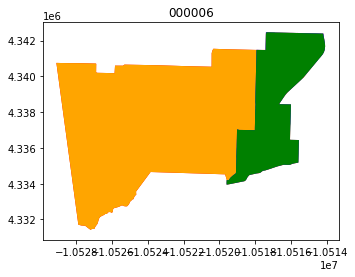

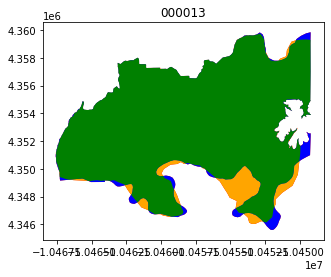

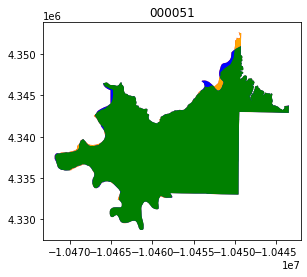

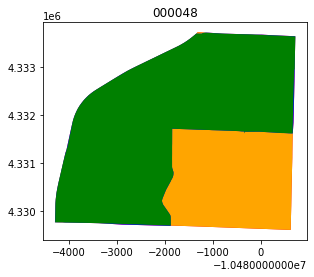

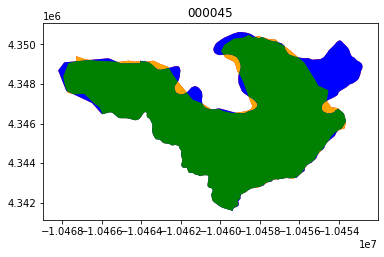

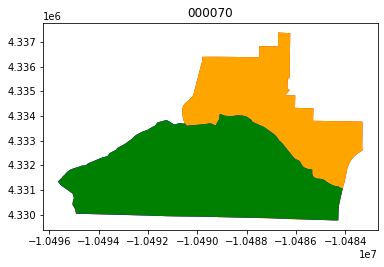

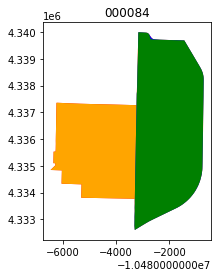

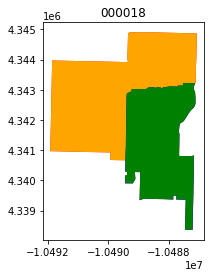

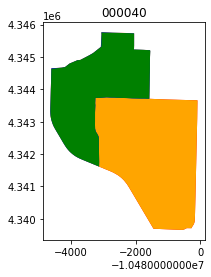

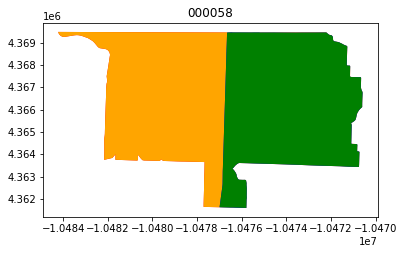

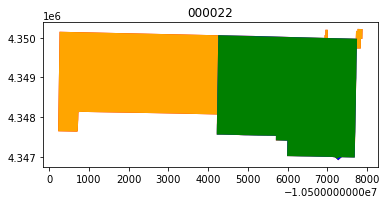

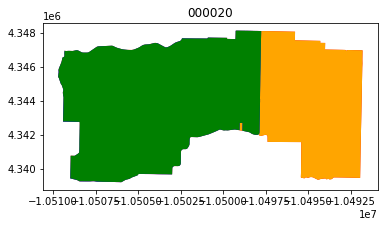

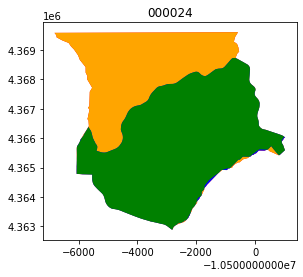

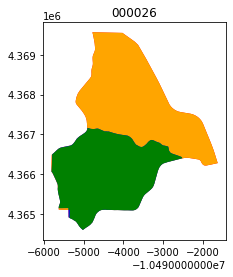

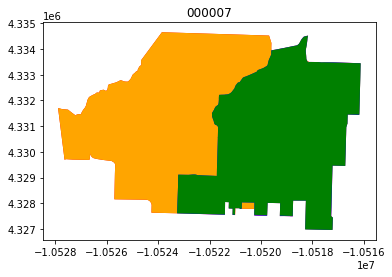

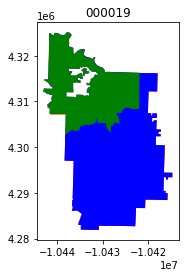

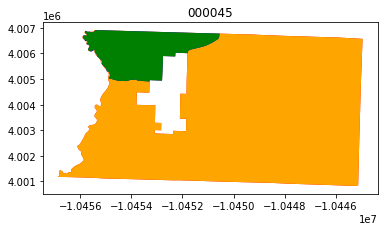

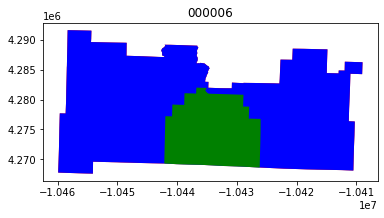

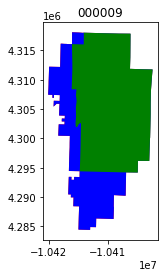

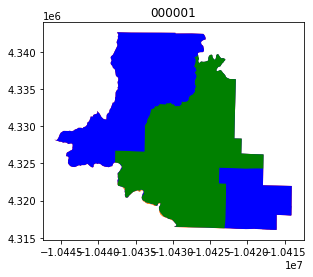

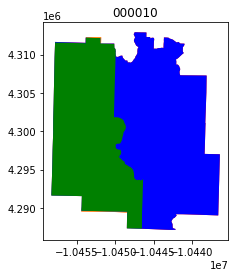

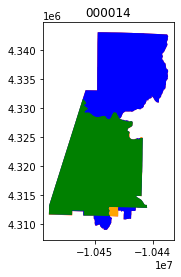

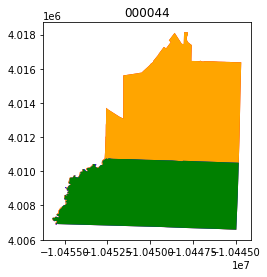

In [58]:
count = 0
area_list = []
for i in range(0,len(source_geoms)):
    diff = source_geoms.iloc[[i]].symmetric_difference(vest_geoms.iloc[[i]])
    intersection = source_geoms.iloc[[i]].intersection(vest_geoms.iloc[[i]])
    area = float(diff.area/10e6)
    area_list.append(area)
    #print("Area is " + str(area))

    if (area > .5):
        count += 1
        name = source_geoms.iat[i,3]
        county = source_geoms.iat[i,1]
        
        print(str(count)+") For " + str(county) + '-' + str(name) + " difference in area is " + str(area))
        if (intersection.iloc[0].is_empty):
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            base.set_title(name)
        else:
            base = diff.plot(color="red")
            source_geoms.iloc[[i]].plot(color="orange",ax=base)
            vest_geoms.iloc[[i]].plot(color="blue",ax=base)
            intersection.plot(color="green",ax=base)
            base.set_title(name)

In [59]:
df = pd.DataFrame(area_list)
print(df.shape)

print(str(len(df[df[0]==0]))+" precincts w/ a difference of 0 km^2")
print(str(len(df[(df[0]<.1) & (df[0]>0)]))+ " precincts w/ a difference between 0 and 0.1 km^2")
print(str(len(df[(df[0]<.5) & (df[0]>=.1)]))+ " precincts w/ a difference between 0.1 and 0.5 km^2")
print(str(len(df[(df[0]<1) & (df[0]>=.5)]))+ " precincts w/ a difference between 0.5 and 1 km^2")
print(str(len(df[(df[0]<2) & (df[0]>=1)]))+ " precincts w/ a difference between 1 and 2 km^2")
print(str(len(df[(df[0]<5) & (df[0]>=2)]))+ " precincts w/ a difference between 2 and 5 km^2")
print(str(len(df[(df[0]>=5)]))+ " precincts w/ a difference greater than 5 km^2")

(2244, 1)
2 precincts w/ a difference of 0 km^2
2024 precincts w/ a difference between 0 and 0.1 km^2
162 precincts w/ a difference between 0.1 and 0.5 km^2
21 precincts w/ a difference between 0.5 and 1 km^2
10 precincts w/ a difference between 1 and 2 km^2
10 precincts w/ a difference between 2 and 5 km^2
15 precincts w/ a difference greater than 5 km^2
